In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from src.news_data import news_data

In [4]:
file_path = os.path.abspath(os.path.join('..', 'datasets', 'raw_analyst_ratings.csv'))

In [12]:
from scripts.lable_sentiment import label_sentiments
from scripts.sentiments import  analyze_headline_sentiment

In [5]:
news = news_data()


In [6]:
df = news.load_news_data(file_path)

In [7]:
df.head(5)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [18]:
df.describe()

,Sentiment
count,1.407328e+06
mean,6.650410e-02
std,2.714077e-01
min,-9.578000e-01
25%,0.000000e+00
50%,0.000000e+00
75%,2.023000e-01
max,9.741000e-01


In [19]:
df.shape

(1407328, 5)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407328 entries, 2020-06-05 to 2011-05-12
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   headline   1407328 non-null  object 
 1   publisher  1407328 non-null  object 
 2   stock      1407328 non-null  object 
 3   Sentiment  1407328 non-null  float64
 4   Label      1407328 non-null  object 
dtypes: float64(1), object(4)
memory usage: 96.7+ MB


In [21]:
df.columns

Index(['headline', 'publisher', 'stock', 'Sentiment', 'Label'], dtype='object')

In [22]:
df.isnull().sum()

headline     0
publisher    0
stock        0
Sentiment    0
Label        0
dtype: int64

In [8]:
news.preprocess_news_data(df)

,Unnamed: 0,headline,url,publisher,stock
date,,,,,
2020-06-05,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
2020-06-03,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2020-05-26,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
2020-05-22,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
2020-05-22,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A
...,...,...,...,...,...
2011-08-29,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX
2011-06-22,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX
2011-06-21,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX


In [9]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [10]:
df=df.drop(columns=['url'],axis=1)

In [11]:
df.head(5)

,headline,publisher,stock
date,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,Benzinga Insights,A
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,Benzinga Insights,A
2020-05-26,71 Biggest Movers From Friday,Lisa Levin,A
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,Lisa Levin,A
2020-05-22,B of A Securities Maintains Neutral on Agilent...,Vick Meyer,A


In [13]:
df =analyze_headline_sentiment(df)

In [69]:
df

,headline,publisher,stock,Sentiment,Label,Hour
date,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,Benzinga Insights,A,0.0000,neutral,0
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,Benzinga Insights,A,0.0000,neutral,0
2020-05-26,71 Biggest Movers From Friday,Lisa Levin,A,0.0000,neutral,0
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,Lisa Levin,A,0.0000,neutral,0
2020-05-22,B of A Securities Maintains Neutral on Agilent...,Vick Meyer,A,0.2960,positive,0
...,...,...,...,...,...,...
2011-08-29,Top Narrow Based Indexes For August 29,Monica Gerson,ZX,0.2023,positive,0
2011-06-22,Recap: Wednesday's Top Percentage Gainers and ...,Benjamin Lee,ZX,-0.3818,negative,0
2011-06-21,UPDATE: Oppenheimer Color on China Zenix Auto ...,BenzingaStaffL,ZX,0.0000,neutral,0


In [16]:
df['Label'] =df['Sentiment'].apply(label_sentiments)

In [17]:
df

,headline,publisher,stock,Sentiment,Label
date,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,Benzinga Insights,A,0.0000,neutral
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,Benzinga Insights,A,0.0000,neutral
2020-05-26,71 Biggest Movers From Friday,Lisa Levin,A,0.0000,neutral
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,Lisa Levin,A,0.0000,neutral
2020-05-22,B of A Securities Maintains Neutral on Agilent...,Vick Meyer,A,0.2960,positive
...,...,...,...,...,...
2011-08-29,Top Narrow Based Indexes For August 29,Monica Gerson,ZX,0.2023,positive
2011-06-22,Recap: Wednesday's Top Percentage Gainers and ...,Benjamin Lee,ZX,-0.3818,negative
2011-06-21,UPDATE: Oppenheimer Color on China Zenix Auto ...,BenzingaStaffL,ZX,0.0000,neutral


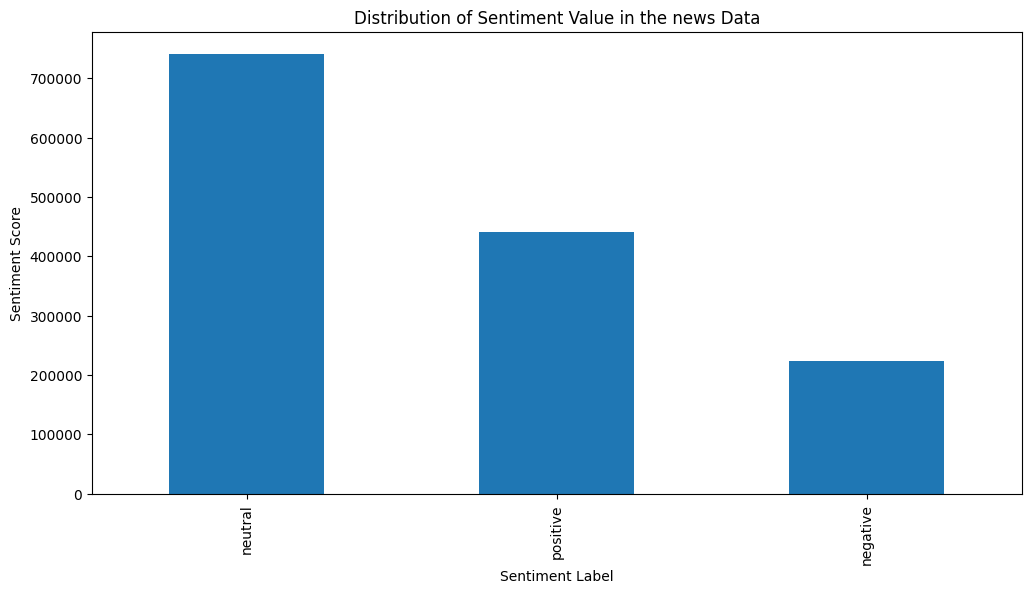

In [32]:
plt.figure(figsize=(12,6))
df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment Value in the news Data')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.savefig('../images/label.png')

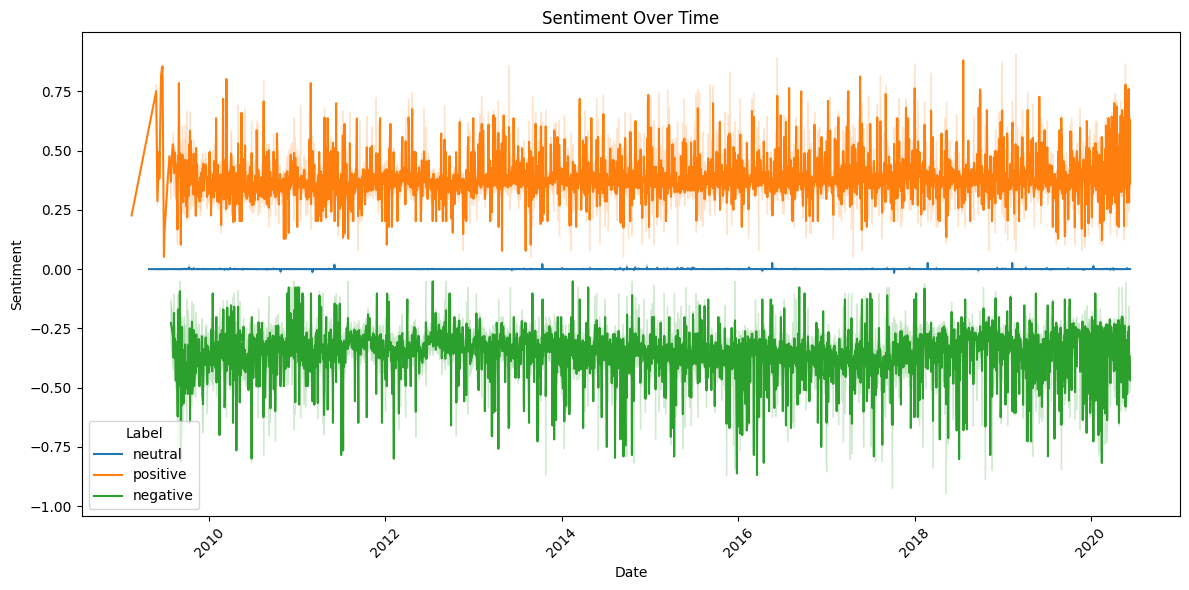

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="Sentiment", hue='Label')
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/Sentiment.png')
plt.show()

In [58]:
print(df.index.name) # Should return <class 'pandas.core.indexes.datetimes.DatetimeIndex'>



date


In [64]:
# Step 1: Reset index (just in case)
df = df.reset_index()

# Step 2: Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Step 3: Set as index
df.set_index('date', inplace=True)


<Axes: title={'center': 'Articles Published Per Day'}, xlabel='date'>

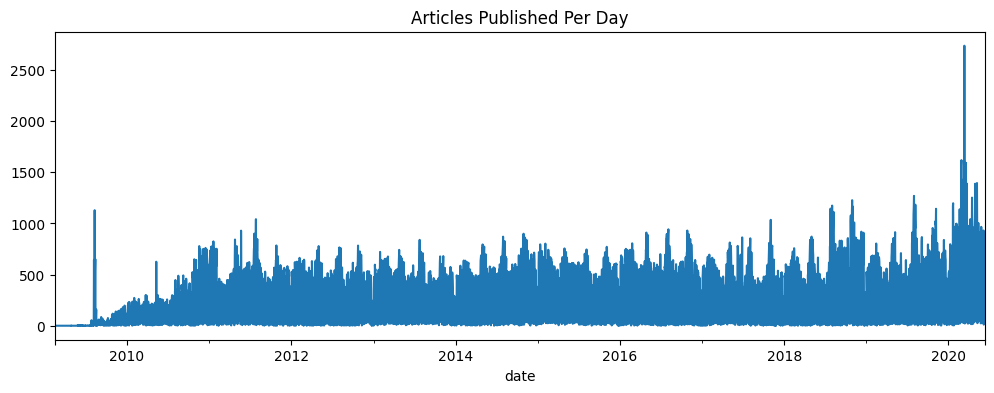

In [66]:
# Group by date and count headlines
daily_article_count = df['headline'].resample('D').count()

# Plot
daily_article_count.plot(title='Articles Published Per Day', figsize=(12, 4))


<Axes: title={'center': 'Articles Published by Hour of Day'}, xlabel='Hour'>

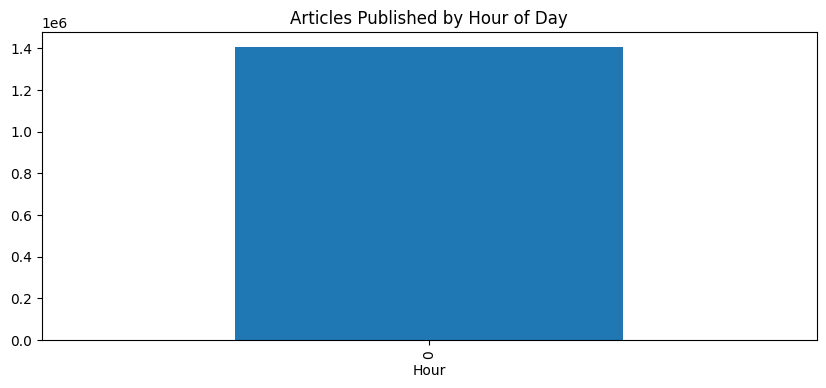

In [68]:

df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 4),
                                            title='Articles Published by Hour of Day')


In [36]:
publisher_count = df['publisher'].value_counts()
print(publisher_count)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


<Axes: title={'center': 'Average Sentiment by Publisher'}, xlabel='publisher'>

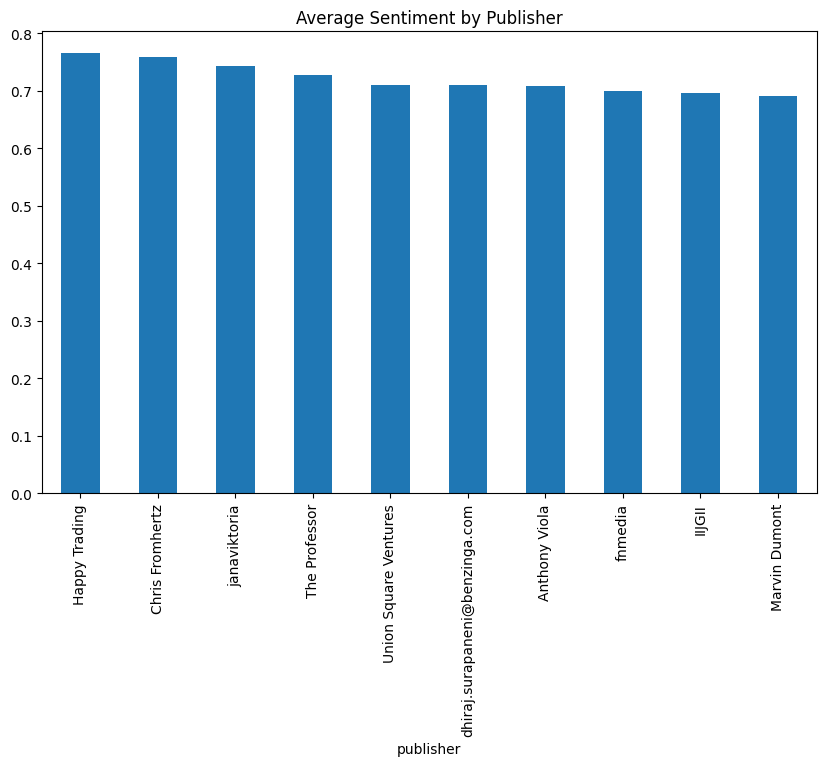

In [51]:
sentiment_by_publisher = df.groupby('publisher')['Sentiment'].mean().sort_values(ascending=False)
sentiment_by_publisher.head(10).plot(kind='bar', title='Average Sentiment by Publisher', figsize=(10, 6))



<Axes: title={'center': 'Top 10 Publishers'}, xlabel='publisher'>

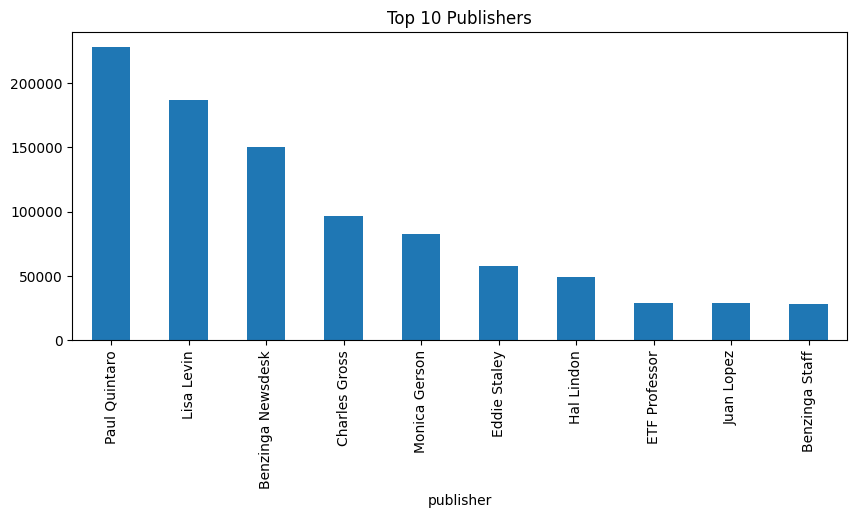

In [48]:
top_publishers = df['publisher'].value_counts().head(10)

# Plot
top_publishers.plot(kind='bar', title='Top 10 Publishers', figsize=(10, 4))


In [70]:
df = df.drop(columns=['Hour'], axis=1)

In [71]:
df.to_csv('../cleaned_datasets/cleaned_news_data.csv')